In [0]:
from fastai.collab import *
from fastai.tabular import *

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
#import libraries

import numpy as np
import pandas as pd
import requests
import json

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Goodbooks - 10k

In this notebook we used the 'goodbooks - 10k' dataset from https://github.com/zygmuntz/goodbooks-10k . This dataset contains six million ratings for ten thousand most popular (with most ratings) books.

In [5]:
!pwd

/content


In [6]:
! git clone https://github.com/zygmuntz/goodbooks-10k.git

Cloning into 'goodbooks-10k'...
remote: Enumerating objects: 66, done.
remote: Total 66 (delta 0), reused 0 (delta 0), pack-reused 66
Unpacking objects: 100% (66/66), done.
Checking out files: 100% (20/20), done.


In [7]:
!ls goodbooks-10k

books.csv  book_tags.csv  LICENSE	    ratings.csv  samples   THANKS.md
books_xml  contrib	  quick_look.ipynb  README.md	 tags.csv  to_read.csv


In [8]:
path = Path(r'goodbooks-10k')
path

PosixPath('goodbooks-10k')

In [9]:
os.listdir(path)

['tags.csv',
 'ratings.csv',
 'LICENSE',
 '.gitignore',
 'THANKS.md',
 'books.csv',
 'contrib',
 'README.md',
 'book_tags.csv',
 '.git',
 'to_read.csv',
 'quick_look.ipynb',
 'books_xml',
 'samples']

In [10]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [11]:
books = pd.read_csv(path/'books.csv')
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [12]:
len(ratings), len(ratings.user_id.unique())

(5976479, 53424)

In [13]:
books[['book_id','title', 'authors']].head()

,book_id,title,authors
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
2,3,"Twilight (Twilight, #1)",Stephenie Meyer
3,4,To Kill a Mockingbird,Harper Lee
4,5,The Great Gatsby,F. Scott Fitzgerald


In [14]:
rating_book = ratings.merge(books[['book_id', 'title', 'authors']])
rating_book.head()

,user_id,book_id,rating,title,authors
0,1,258,5,The Shadow of the Wind (The Cemetery of Forgot...,"Carlos Ruiz Zafón, Lucia Graves"
1,11,258,3,The Shadow of the Wind (The Cemetery of Forgot...,"Carlos Ruiz Zafón, Lucia Graves"
2,143,258,4,The Shadow of the Wind (The Cemetery of Forgot...,"Carlos Ruiz Zafón, Lucia Graves"
3,242,258,5,The Shadow of the Wind (The Cemetery of Forgot...,"Carlos Ruiz Zafón, Lucia Graves"
4,325,258,4,The Shadow of the Wind (The Cemetery of Forgot...,"Carlos Ruiz Zafón, Lucia Graves"


In [35]:
book_idx = 27
check = rating_book.set_index('user_id')
#check = check.loc[13925]
is_book = check['book_id'] == book_idx
check = check[is_book]

check

,book_id,rating,title,authors
user_id,,,,
4,27,5,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
15,27,4,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
29,27,5,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
31,27,3,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
24,27,4,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
58,27,4,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
61,27,4,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
65,27,5,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
73,27,4,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"


In [0]:
data = CollabDataBunch.from_df(rating_book, seed=42, valid_pct=0.1, item_name='title')

In [17]:
data.show_batch()

user_id,title,target
27322,The Bell Jar,4.0
28504,The Handmaid's Tale,4.0
52675,The Fault in Our Stars,5.0
26545,"The Dragon Reborn (Wheel of Time, #3)",4.0
45000,"The Blood of Olympus (The Heroes of Olympus, #5)",5.0


In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


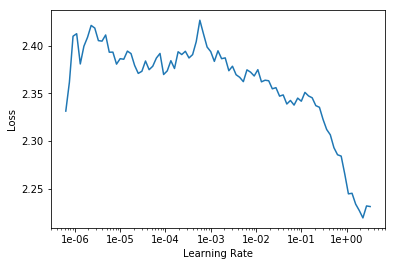

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 5e-1)

epoch,train_loss,valid_loss,time
0,1.972879,1.996871,08:39
1,2.200772,2.079093,08:46
2,1.939456,1.958681,08:45
3,1.631965,1.638421,08:45
4,1.007913,1.006665,08:41


In [0]:
model_path = Path(r'content/gdrive/My Drive/fastai-v3/models/collab-one.pth')
model_path

PosixPath('content/gdrive/My Drive/fastai-v3/models/collab-one.pth')

In [0]:
learn.save('collab-one')

## Interpretation

### Setup

In [0]:
model_path = Path('/content/gdrive/My Drive/fastai-v3/models/collab-one')

In [22]:
learn.load(model_path)

CollabLearner(data=TabularDataBunch;

Train: LabelList (5378832 items)
x: CollabList
user_id 11; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); ,user_id 143; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); ,user_id 242; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); ,user_id 325; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); ,user_id 362; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); 
y: FloatList
3.0,4.0,5.0,4.0,2.0
Path: .;

Valid: LabelList (597647 items)
x: CollabList
user_id 11763; title How to Eat Fried Worms; ,user_id 16402; title Echo Burning (Jack Reacher, #5); ,user_id 29264; title A Bend in the Road; ,user_id 13248; title The Girl on the Train; ,user_id 15647; title The Godfather; 
y: FloatList
5.0,3.0,4.0,3.0,4.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(53425, 40)
  (i_weight): Embedding(9965, 40)
  (u_bias): Embedding(53425, 1)
  (i_bi

In [23]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(53425, 40)
  (i_weight): Embedding(9965, 40)
  (u_bias): Embedding(53425, 1)
  (i_bias): Embedding(9965, 1)
)

In [44]:
#create an array with 15 books voted the most amount of times
g = rating_book.groupby('book_id')['rating'].count()
top_books = g.sort_values(ascending=False).index.values[:1000]
top_books_15 = top_books[:15]
top_books_15

array([ 1,  2,  4,  3,  5, 17, 20, 18, 23,  7, 24, 25, 21, 27, 13])

In [51]:
#create an array with 15 users that voted top 15 books the most amount of times
rating = rating_book.set_index('book_id')
rating = rating.loc[top_books_15]
g2 = rating.groupby('user_id')['rating'].count()
top_users = g2.sort_values(ascending=False).index.values
top_users_15 = top_users[:15]
top_users_15

array([18077, 16724, 28741, 11456, 46400,  1979, 14687, 31217, 34841, 13197, 15954,  4517, 24043, 13925, 13120])

In [0]:
# f = rating_book.groupby('user_id')['rating'].count()
# top_users = f.sort_values(ascending=False).index.values[:1000]
# top_users_15 = top_users[:15]
# top_users

array([30944, 12874, 52036, 28158, ...,  5109, 31512, 25938, 14119])

In [0]:
#create a book_id, user_id, rating matrix

data_matrix = np.zeros((len(top_books_15), len(top_users_15)))

col = 0

for user in top_users_15:
  row = 0
  for book in top_books_15:
    
    is_user = rating_book['user_id'] == user
    filter = rating_book[is_user]['book_id'] == book
    rating = rating_book[is_user][filter]
    rating = rating.set_index('book_id')
    
    if rating.empty:
      

      data_matrix[row, col] = np.nan
      row += 1
      
    else:
      
      data_matrix[row, col] = rating.loc[book, 'rating']
      row += 1
      
      
  col += 1

In [0]:
normal_matrix = np.zeros((225, 3))

row = 0
for user in top_users_15:
  
  for book in top_books_15:
    is_user = rating_book['user_id'] == user
    filter = rating_book[is_user]['book_id'] == book
    rating = rating_book[is_user][filter]
    rating = rating.set_index('book_id')
    normal_matrix[row, 0] = user
    normal_matrix[row, 1] = book
    normal_matrix[row, 2] = rating.loc[book, 'rating']
    row+=1

In [0]:
normal_ratings = pd.DataFrame(normal_matrix, columns = ['user_id', 'movie_id', 'rating'])
normal_ratings

,user_id,movie_id,rating
0,18077.0,1.0,4.0
1,18077.0,2.0,3.0
2,18077.0,4.0,4.0
3,18077.0,3.0,2.0
4,18077.0,5.0,3.0
5,18077.0,17.0,3.0
6,18077.0,20.0,2.0
7,18077.0,18.0,4.0
8,18077.0,23.0,3.0
9,18077.0,7.0,3.0


In [0]:
top_ratings = pd.DataFrame(data_matrix, columns = top_users_15, index = top_books_15)
top_ratings

,18077,16724,28741,11456,46400,1979,14687,31217,34841,13197,15954,4517,24043,13925,13120
1,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0
2,3.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0
4,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0
3,2.0,4.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,5.0,1.0,4.0
5,3.0,3.0,2.0,5.0,4.0,5.0,5.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0
17,3.0,5.0,4.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0
20,2.0,4.0,4.0,3.0,3.0,4.0,4.0,5.0,3.0,3.0,3.0,5.0,3.0,5.0,4.0
18,4.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0
23,3.0,5.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0
7,3.0,4.0,5.0,5.0,3.0,3.0,4.0,3.0,3.0,5.0,4.0,4.0,4.0,3.0,4.0


In [0]:
path= Path('/content/data')

In [0]:
top_ratings.to_excel(path / 'top_ratings.xlsx')

In [0]:
normal_ratings.to_excel(path / 'normal_ratings.xlsx')

### Books bias

In [34]:
g = rating_book.groupby('title')['rating'].count()
top_books = g.sort_values(ascending=False).index.values[:1000]
top_books_15 = top_books[:15]
top_books_15

array(['The Hunger Games (The Hunger Games, #1)', "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
       'To Kill a Mockingbird', 'Twilight (Twilight, #1)', 'The Great Gatsby', 'Catching Fire (The Hunger Games, #2)',
       'Mockingjay (The Hunger Games, #3)', 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
       'Harry Potter and the Chamber of Secrets (Harry Potter, #2)', 'The Hobbit',
       'Harry Potter and the Goblet of Fire (Harry Potter, #4)',
       'Harry Potter and the Deathly Hallows (Harry Potter, #7)',
       'Harry Potter and the Order of the Phoenix (Harry Potter, #5)',
       'Harry Potter and the Half-Blood Prince (Harry Potter, #6)', '1984'], dtype=object)

In [37]:
books_bias = learn.bias(top_books, is_item=True)
books_bias.shape

torch.Size([1000])

In [41]:
books_bias_15 = learn.bias(top_books_15, is_item=True)
books_bias_15

tensor([0.8068, 0.8217, 0.8503, 0.0793, 0.4128, 0.6625, 0.4783, 0.8783, 0.7374,
        0.6264, 0.9435, 1.0105, 0.8524, 0.9403, 0.6186])

In [63]:
learn.data.x

CollabList (5378832 items)
user_id 11; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); ,user_id 143; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); ,user_id 242; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); ,user_id 325; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); ,user_id 362; title The Shadow of the Wind (The Cemetery of Forgotten Books,  #1); 
Path: .

In [0]:
mean_ratings = rating_book.groupby('title')['rating'].mean()
books_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_books, books_bias)]

In [0]:
item0 = lambda o:o[0]

In [0]:
sorted(books_ratings, key=item0)[:15]

[(tensor(0.0236),
  'Fifty Shades of Grey (Fifty Shades, #1)',
  3.0924391506991196),
 (tensor(0.0695), 'The Secret (The Secret, #1)', 3.1555555555555554),
 (tensor(0.0793), 'Twilight (Twilight, #1)', 3.214340558738409),
 (tensor(0.0832), 'The Tommyknockers', 3.382425742574257),
 (tensor(0.0868), 'Ethan Frome', 3.2476987447698744),
 (tensor(0.0880), 'New Moon (Twilight, #2)', 3.217359967051071),
 (tensor(0.0917), 'The Red Badge of Courage', 3.1833962264150943),
 (tensor(0.0935), 'The Tenth Circle', 3.304841149773071),
 (tensor(0.0986), 'The Nanny Diaries (Nanny, #1)', 3.2395676973881717),
 (tensor(0.1139),
  'The Short Second Life of Bree Tanner: An Eclipse Novella (Twilight, #3.5)',
  3.3007730147575542),
 (tensor(0.1141),
  "The Girls' Guide to Hunting and Fishing",
  3.268808777429467),
 (tensor(0.1185), 'The Dinner', 3.1718161266013563),
 (tensor(0.1186), 'Eat, Pray, Love', 3.260114140773621),
 (tensor(0.1203), 'Fallen (Fallen, #1)', 3.491145218417946),
 (tensor(0.1230), 'Go Set a 

In [0]:
sorted(books_ratings, key=item0, reverse=True)[:15]

[(tensor(1.0105),
  'Harry Potter and the Deathly Hallows (Harry Potter, #7)',
  4.525940930475692),
 (tensor(0.9435),
  'Harry Potter and the Goblet of Fire (Harry Potter, #4)',
  4.430780132706307),
 (tensor(0.9403),
  'Harry Potter and the Half-Blood Prince (Harry Potter, #6)',
  4.443339301107353),
 (tensor(0.8783),
  'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
  4.418732261116367),
 (tensor(0.8552), 'The Help', 4.382886776145203),
 (tensor(0.8524),
  'Harry Potter and the Order of the Phoenix (Harry Potter, #5)',
  4.358697076943243),
 (tensor(0.8503), 'To Kill a Mockingbird', 4.3293692372171),
 (tensor(0.8379),
  'The Return of the King (The Lord of the Rings, #3)',
  4.424735428842205),
 (tensor(0.8217),
  "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
  4.351350114416476),
 (tensor(0.8138),
  'A Game of Thrones (A Song of Ice and Fire, #1)',
  4.339880284324729),
 (tensor(0.8106),
  'Unbroken: A World War II Story of Survival, Resilience, and Red

### Books weights

In [0]:
books_w = learn.weight(top_books, is_item=True)
books_w.shape

torch.Size([1000, 40])

In [0]:
books_pca = books_w.pca(3)
books_pca.shape

torch.Size([1000, 3])

In [0]:
books_pca

tensor([[ 0.3214,  0.7896, -0.1253],
        [ 0.4135,  0.5307,  0.0209],
        [ 0.1160, -0.2048, -0.2478],
        ...,
        [-0.6417,  0.0077,  0.1515],
        [ 0.3035, -0.1301,  0.1368],
        [ 0.4807,  0.2416,  0.0161]])

In [0]:
fac0,fac1,fac2 = books_pca.t()
books_comp0 = [(f, i) for f,i in zip(fac0, top_books)]

In [0]:
sorted(books_comp0, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9139),
  'The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury'),
 (tensor(0.9053), 'The House of Hades (The Heroes of Olympus, #4)'),
 (tensor(0.9052), 'A Light in the Attic'),
 (tensor(0.8953), 'Calvin and Hobbes'),
 (tensor(0.8721), 'The Very Hungry Caterpillar Board Book'),
 (tensor(0.8221), 'Harry Potter Boxset (Harry Potter, #1-7)'),
 (tensor(0.7856), 'Clockwork Prince (The Infernal Devices, #2)'),
 (tensor(0.7582), 'Throne of Glass (Throne of Glass, #1)'),
 (tensor(0.7544), 'The Polar Express'),
 (tensor(0.7380), 'Crown of Midnight (Throne of Glass, #2)')]

In [0]:
sorted(books_comp0, key=itemgetter(0))[:10]

[(tensor(-1.1128), 'The Dinner'),
 (tensor(-0.9508), 'Go Set a Watchman'),
 (tensor(-0.8774), 'The Casual Vacancy'),
 (tensor(-0.8705), 'Men Are from Mars, Women Are from Venus'),
 (tensor(-0.8077), 'The Red Badge of Courage'),
 (tensor(-0.7673), 'Luckiest Girl Alive'),
 (tensor(-0.7652), 'Reached (Matched, #3)'),
 (tensor(-0.7539), "The Pilot's Wife"),
 (tensor(-0.7495), 'Abraham Lincoln: Vampire Hunter'),
 (tensor(-0.7331), 'A Million Little Pieces')]

In [0]:
books_comp1 = [(f, i) for f,i in zip(fac1, top_books)]

In [0]:
sorted(books_comp1, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0506), 'Twilight (Twilight, #1)'),
 (tensor(1.0243), 'Fifty Shades of Grey (Fifty Shades, #1)'),
 (tensor(0.8379), 'Eclipse (Twilight, #3)'),
 (tensor(0.8379), 'Catching Fire (The Hunger Games, #2)'),
 (tensor(0.8191), 'Breaking Dawn (Twilight, #4)'),
 (tensor(0.7896), 'The Hunger Games (The Hunger Games, #1)'),
 (tensor(0.7426), 'Fifty Shades Freed (Fifty Shades, #3)'),
 (tensor(0.7418), 'City of Bones (The Mortal Instruments, #1)'),
 (tensor(0.7269), 'New Moon (Twilight, #2)'),
 (tensor(0.7264), 'Divergent (Divergent, #1)')]

In [0]:
sorted(books_comp1, key=itemgetter(0))[:10]

[(tensor(-0.5409), 'Hamlet'),
 (tensor(-0.5321), '1984'),
 (tensor(-0.4825), 'The Adventures of Huckleberry Finn'),
 (tensor(-0.4679), 'A Clockwork Orange'),
 (tensor(-0.4619), 'Animal Farm'),
 (tensor(-0.4585), 'The Fellowship of the Ring (The Lord of the Rings, #1)'),
 (tensor(-0.4281), 'Heart of Darkness'),
 (tensor(-0.4174), 'Othello'),
 (tensor(-0.4038), 'A Tale of Two Cities'),
 (tensor(-0.4007), 'The Hobbit')]

In [0]:
idxs = np.random.choice(len(top_books), 50, replace=False)
idxs

array([977, 148, 232, 696, 733, 723, 505, 967, 291, 631, 536, 487, 190, 626, 858, 856, 896, 202, 414, 769,  40, 771,
       695, 167,  41, 596, 560, 845, 528, 109, 240, 869, 676, 989, 392, 763, 815, 132, 362,  33, 732, 313, 642, 684,
       478,  25, 687, 674, 114, 760])

In [0]:
len(fac0) == len(fac1) == len(top_books)

True

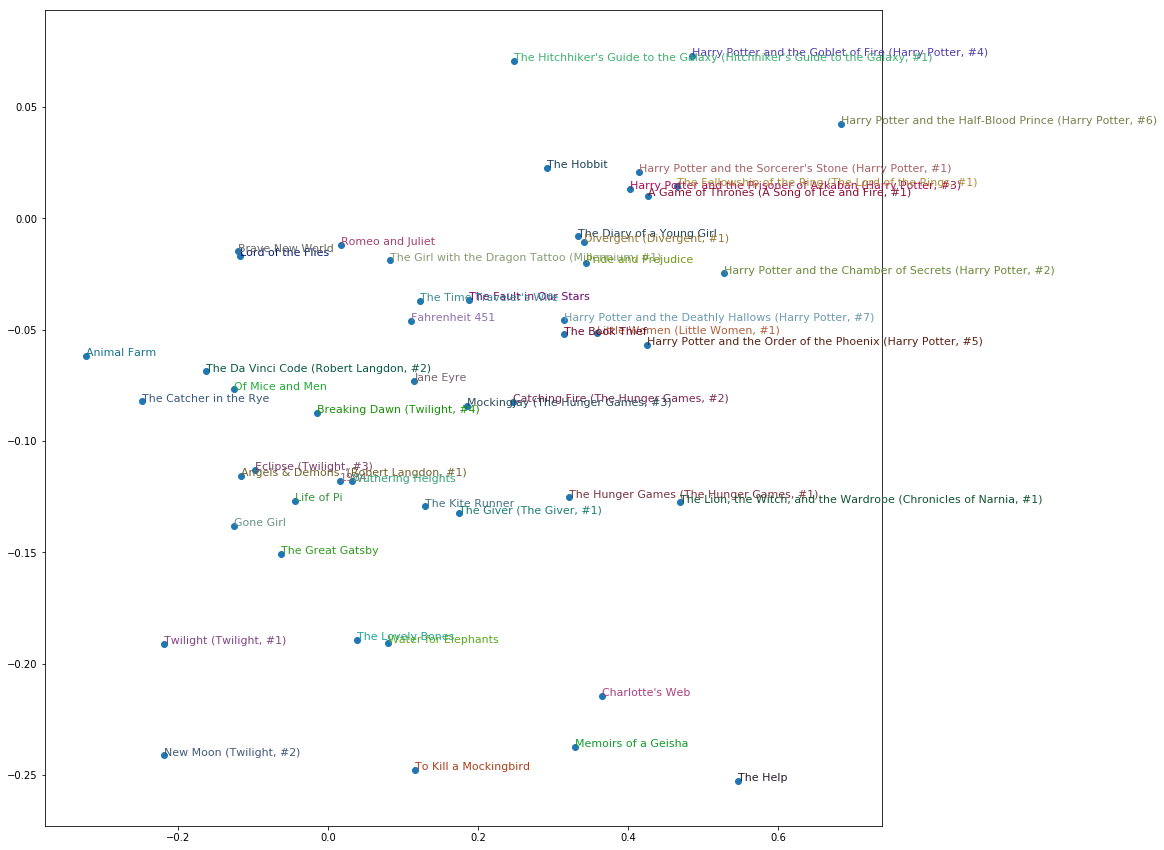

In [0]:
idxs = np.random.choice(len(top_books), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_books[idxs], X, Y):
    #matplotlib.pyplot.text 'Add the text s to the axes at location x, y in data coordinates.' 
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()